Machine Learning es la ciencia (y el arte) de programar computadores para que aprendan de los datos -- Aurélien Géron en Hands-ON Machine Learning with Scikit-Learn, Keras & TensorFlow


Podemos decir que un programa de computador aprende de los datos si a medida que introducimos nuevos datos realiza una determinada tarea cada vez mejor, según una determinada medida de rendimiento -- Tom Michell, 1997. Traducción aproximada

Necesitamos tres elementos:

1. Tarea a realizar por nuestro programa
2. Datos 
3. Medida de rendimiento (o error)

Resultado: Mejora del rendimiento (3) al realizar la tarea (1) cuando introducimos nuevos datos (2) 

Todos los modelos son erróneos, pero algunos son útiles -- George Edward Pelham Box

In [1]:
import pandas as pd

In [2]:
import pandas as pd
dt_small = pd.DataFrame([279, 280, 277, 279, 282, 277, 283, 279, 280, 270, 281, 278, 272, 276, 288, 268, 266, 278, 278, 279, 277])
dt_small.columns = ["dur_embarazo"]

### Task: acertar la duración del embarazo
## Error/Rendimiento
* Sumar: 1 si no es exactamente el mismo día, 0 si es el mismo día
* Sumar: diferencia absoluta entre lo predicho y lo real
* Sumar: diferencia al cuadrado entre lo predicho y lo real
* Sumar y hacer raíz cuadrada: diferencia al cuadrado entre lo predicho y lo real
## Modelo
* Siempre es 276/277/279
* Moda/Media/Mediana

In [9]:
dt_small['modelo_276'] = 276
dt_small['modelo_279'] = 279
dt_small['modelo_277'] = 277
dt_small['modelo_moda'] = dt_small['dur_embarazo'].mode().iloc[0] # Porque la moda te devuelve un dataframe
dt_small['modelo_media'] = dt_small['dur_embarazo'].mean()
dt_small['modelo_mediana'] = dt_small['dur_embarazo'].median()


In [10]:
dt_small["aciertos_276"] = dt_small["dur_embarazo"] == dt_small["modelo_276"] 
dt_small["aciertos_277"] = dt_small["dur_embarazo"] == dt_small["modelo_277"] 
dt_small["aciertos_279"] = dt_small["dur_embarazo"] == dt_small["modelo_279"] 
dt_small["aciertos_mediana"] = dt_small["dur_embarazo"] == dt_small["modelo_mediana"] 

In [11]:
dt_small[['aciertos_276', 'aciertos_277', 'aciertos_279', 'aciertos_mediana']].mean()

aciertos_276        0.047619
aciertos_277        0.142857
aciertos_279        0.190476
aciertos_mediana    0.142857
dtype: float64

 ### Task: minimizar que la madre no esté preparada

,dur_embarazo
0,279


### ¿Qué es mejorar el rendimiento al introducir más datos?

In [12]:
import pandas as pd
dt_emb = pd.read_csv("dur_emb.csv")

In [39]:
dt_emb["modelo_276"] = 276
dt_emb["modelo_277"] = 277
dt_emb["modelo_279"] = 279
dt_emb["modelo_moda"] = dt_emb["dur_embarazo"].mode().iloc[0]
dt_emb["modelo_media"] = dt_emb["dur_embarazo"].mean()
dt_emb["modelo_mediana"] = dt_emb["dur_embarazo"].median()

In [40]:
dt_emb["aciertos_276"] = dt_emb["dur_embarazo"] == dt_emb["modelo_276"] 
dt_emb["aciertos_277"] = dt_emb["dur_embarazo"] == dt_emb["modelo_277"] 
dt_emb["aciertos_279"] = dt_emb["dur_embarazo"] == dt_emb["modelo_279"] 
dt_emb["aciertos_moda"] = dt_emb["dur_embarazo"] == dt_emb["modelo_moda"] 
dt_emb["aciertos_mediana"] = dt_emb["dur_embarazo"] == dt_emb["modelo_mediana"] 

In [41]:
dt_emb[["aciertos_276", "aciertos_277", "aciertos_279", "aciertos_mediana", "aciertos_moda"]].mean()

aciertos_276        0.029091
aciertos_277        0.032727
aciertos_279        0.029091
aciertos_mediana    0.029091
aciertos_moda       0.044545
dtype: float64

In [43]:
dt_emb["error_abs_276"] = abs(dt_emb["dur_embarazo"] - dt_emb["modelo_276"]) 
dt_emb["error_abs_277"] = abs(dt_emb["dur_embarazo"] - dt_emb["modelo_277"])
dt_emb["error_abs_279"] = abs(dt_emb["dur_embarazo"] - dt_emb["modelo_279"]) 
dt_emb["error_abs_mediana"] = abs(dt_emb["dur_embarazo"] - dt_emb["modelo_mediana"]) 
dt_emb["error_abs_media"] = abs(dt_emb["dur_embarazo"] - dt_emb["modelo_media"]) 
dt_emb["error_abs_moda"] = abs(dt_emb["dur_embarazo"] - dt_emb["modelo_moda"]) 

In [44]:
dt_emb[dt_emb.columns[dt_emb.columns.str.startswith("error_abs")]].sum()

error_abs_276        12474.000000
error_abs_277        12292.000000
error_abs_279        12146.000000
error_abs_mediana    12146.000000
error_abs_media      12401.530909
error_abs_moda       12174.000000
dtype: float64

In [58]:
dt_emb[dt_emb.columns[dt_emb.columns.str.startswith("error_abs")]].mean()

error_abs_276        11.340000
error_abs_277        11.174545
error_abs_279        11.041818
error_abs_mediana    11.041818
error_abs_media      11.274119
error_abs_moda       11.067273
dtype: float64

In [59]:
dt_emb[dt_emb.columns[dt_emb.columns.str.startswith("error_abs")]].median()

error_abs_276        8.000000
error_abs_277        8.000000
error_abs_279        8.000000
error_abs_mediana    8.000000
error_abs_media      8.398182
error_abs_moda       8.000000
dtype: float64

In [46]:
dt_emb["error_sqrt_276"] = abs(dt_emb["dur_embarazo"] - dt_emb["modelo_276"])**2 
dt_emb["error_sqrt_277"] = abs(dt_emb["dur_embarazo"] - dt_emb["modelo_277"])**2
dt_emb["error_sqrt_279"] = abs(dt_emb["dur_embarazo"] - dt_emb["modelo_279"])**2 
dt_emb["error_sqrt_mediana"] = abs(dt_emb["dur_embarazo"] - dt_emb["modelo_mediana"])**2 
dt_emb["error_sqrt_media"] = abs(dt_emb["dur_embarazo"] - dt_emb["modelo_media"])**2 
dt_emb["error_sqrt_moda"] = abs(dt_emb["dur_embarazo"] - dt_emb["modelo_moda"])**2 

In [47]:
dt_emb[dt_emb.columns[dt_emb.columns.str.startswith("error_sqrt")]].sum()

error_sqrt_276        259592.000000
error_sqrt_277        259816.000000
error_sqrt_279        266864.000000
error_sqrt_mediana    266864.000000
error_sqrt_media      259417.596364
error_sqrt_moda       273688.000000
dtype: float64

In [60]:
dt_emb

,dur_embarazo,modelo_276,modelo_277,modelo_279,modelo_moda,modelo_media,modelo_mediana,aciertos_276,aciertos_277,aciertos_279,...,error_abs_279,error_abs_mediana,error_abs_media,error_abs_moda,error_sqrt_276,error_sqrt_277,error_sqrt_279,error_sqrt_mediana,error_sqrt_media,error_sqrt_moda
0,293.0,276,277,279,280.0,276.398182,279.0,False,False,False,...,14.0,14.0,16.601818,13.0,289.0,256.0,196.0,196.0,275.620367,169.0
1,267.0,276,277,279,280.0,276.398182,279.0,False,False,False,...,12.0,12.0,9.398182,13.0,81.0,100.0,144.0,144.0,88.325821,169.0
2,283.0,276,277,279,280.0,276.398182,279.0,False,False,False,...,4.0,4.0,6.601818,3.0,49.0,36.0,16.0,16.0,43.584003,9.0
3,294.0,276,277,279,280.0,276.398182,279.0,False,False,False,...,15.0,15.0,17.601818,14.0,324.0,289.0,225.0,225.0,309.824003,196.0
4,271.0,276,277,279,280.0,276.398182,279.0,False,False,False,...,8.0,8.0,5.398182,9.0,25.0,36.0,64.0,64.0,29.140367,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,246.0,276,277,279,280.0,276.398182,279.0,False,False,False,...,33.0,33.0,30.398182,34.0,900.0,961.0,1089.0,1089.0,924.049458,1156.0
1096,236.0,276,277,279,280.0,276.398182,279.0,False,False,False,...,43.0,43.0,40.398182,44.0,1600.0,1681.0,1849.0,1849.0,1632.013094,1936.0
1097,239.0,276,277,279,280.0,276.398182,279.0,False,False,False,...,40.0,40.0,37.398182,41.0,1369.0,1444.0,1600.0,1600.0,1398.624003,1681.0
1098,249.0,276,277,279,280.0,276.398182,279.0,False,False,False,...,30.0,30.0,27.398182,31.0,729.0,784.0,900.0,900.0,750.660367,961.0


In [64]:
import math
dt_emb[dt_emb.columns[dt_emb.columns.str.startswith("error_sqrt")]].sum()

error_sqrt_276        259592.000000
error_sqrt_277        259816.000000
error_sqrt_279        266864.000000
error_sqrt_mediana    266864.000000
error_sqrt_media      259417.596364
error_sqrt_moda       273688.000000
dtype: float64

In [63]:
math.sqrt(dt_emb["error_sqrt_media"].mean())

15.35689351764857

<Axes: ylabel='Frequency'>

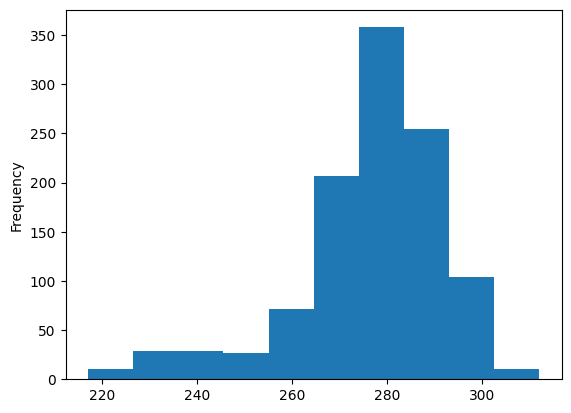

In [66]:
dt_emb["dur_embarazo"].plot.hist()